### Розыгрыш непрерывных случайных величин

#### 1. Общая схема метода Монте-Карло
Пусть требуется вычислить какую-то неизвестную величину $m$. Возьмем такую случайную величину $ξ$, чтобы $Mξ=m$. Пусть при этом $Dξ=b^2$.

Рассмотрим N независимых случайных величин $ξ_1, ξ_2,.. ξ_N$, распределения которых совпадают с распределением $ξ$.

Если N достаточно велико, то, согласно центральной предельной теореме, распределение суммы будет приблизительно нормальным с параметрами $a=Nm$, $\sigma = b\sqrt{N}$.

Из правила «трех сигм» следует, что 

$$P\left\{\left|\frac{1}{N}\sum_{i=1}^{N}{\xi_{i} - m} \right|<\frac{3b}{\sqrt{N}}>\right\} \approx 0.997 $$

Это – чрезвычайно важное для метода Монте-Карло соотношение. Оно дает нам и метод расчета $m$,и оценку погрешности.

#### 2. Разыгрывание случайных величин
- Значения любой случайной величины, распределенной по некоторому закону, можно получить путем преобразования значений одной какой-либо (так сказать «стандартной») случайной величины.
- Обычно роль «стандартной» величины играет случайная величина $\gamma$, равномерно распределенная на интервале (0,1). Эту случайную величину получают с помощью различных  методик, реализованных в виде компьютерных программ (генераторы случайных чисел и т.п.).
- Будем называть процесс нахождения какой-либо случайной величины $ξ$ путем преобразования одного или нескольких значений $\gamma$ разыгрыванием
случайной величины $\xi$.

Допустим, нужно получить значения случайной величины $ξ$, распределенной в интервале $(a,b)$ с плотностью вероятности $f_{\xi}(x)$.

Легко доказать, что значения ξ находятся из уравнения:

$$\int_{a}^{\xi} {f_{\xi}(x)}\mathrm{d}x = \gamma$$ 

т.е. выбрав очередное значение «стандартной» случайной величины $γ$, надо решить уравнение (*) и найти очередное значение $ξ$.

**$y(x) = \gamma$ – первообразная для $f_\xi(x)$**

**Пример 1**
$$f_{\xi}(x)=e^{-x}, x\geq 0$$ 
$$F_{\xi}(x)=\int_{a}^{\xi} {e^{-x}}\mathrm{d}x =1-e^{-x}= \gamma$$

Тогда $x=-ln(1-\gamma)$.
Так как $(1-\gamma) \sim \gamma$, то $x=-ln(\gamma)$.


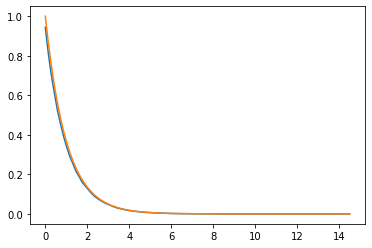

In [2]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000000
# "стандартные случайные величины"
gamma = np.random.random(N)
# розыгрыш сл. величины, распределенной по экспоненциальному закону
x = -np.log(gamma)
# гистограмма
fr, X = np.histogram(x, bins=100)

# нормирование для сопоставления с плотностью
X = X[:-1]
fr = fr / N * 100 / (max(X) - min(X))
# плотность
Y = np.exp(-X)
# вывод графиков
plt.plot(X, fr)
plt.plot(X, Y)
plt.show()


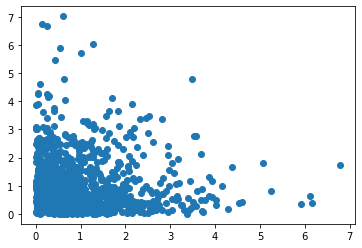

In [3]:
gx = np.random.random(1000)
gy = np.random.random(1000)
x = -np.log(gx)
y = -np.log(gy)
plt.scatter(x,y)

**Пример 2**
$$f_{\xi}(x) =
  \begin{cases}
    0,       & \quad x \leq 2\\
    2x-4,    & \quad 2 < x \leq 3\\
    0,       & \quad x > 3
  \end{cases}
$$ 
$$F_{\xi}(x) =
  \begin{cases}
    0,       & \quad x \leq 2\\
    (x-2)^2, & \quad 2 < x \leq 3\\
    1,       & \quad x > 3
  \end{cases} = \gamma
$$

Тогда $x=\sqrt{\gamma} + 2$.


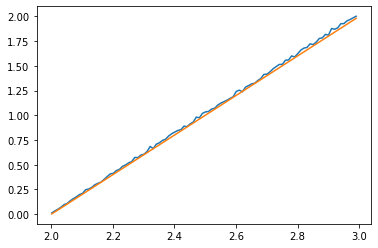

In [4]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000000
# "стандартные случайные величины"
gamma = np.random.random(N)
# розыгрыш сл. величины
x = gamma ** 0.5 + 2
# гистограмма
fr, X = np.histogram(x, bins=100)

# нормирование для сопоставления с плотностью
X = X[:-1]
fr = fr / N * 100 / (max(X) - min(X))
# плотность
Y = 2 * X - 4
# вывод графиков
plt.plot(X, fr)
plt.plot(X, Y)
plt.show()

**Пример 3**
$$f_{\xi}(x) =
  \begin{cases}
    0,       & \quad x \leq \frac{\pi}{2}\\
    \frac{\pi}{2}cos(\pi x),    & \quad -\frac{\pi}{2} < x \leq \frac{\pi}{2}\\
    0,       & \quad x > \frac{\pi}{2}
  \end{cases}
$$ 
$$F_{\xi}(x) =
  \begin{cases}
    0,       & \quad x \leq 2\\
    \frac{1}{2}\left(sin(\pi x)+1 \right), & \quad 2 < x \leq 3\\
    1,       & \quad x > 3
  \end{cases} = \gamma
$$

Тогда $x=\frac{1}{\pi} arcsin (2\gamma - 1)$.


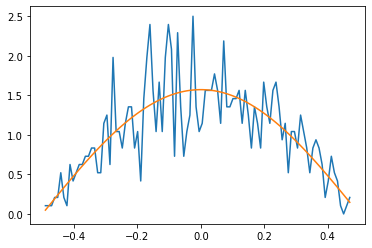

In [5]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000
# "стандартные случайные величины"
gamma = np.random.random(N)
# розыгрыш сл. величины
x = np.arcsin(2 * gamma - 1) / np.pi
# гистограмма
fr, X = np.histogram(x, bins=100)

# нормирование для сопоставления с плотностью
X = X[:-1]
fr = fr / N * 100 / (max(X) - min(X))
# плотность
Y = np.pi / 2 * np.cos(np.pi * X) 
# вывод графиков
plt.plot(X, fr)
plt.plot(X, Y)
plt.show()

**Пример 4 Нормальное распределение**
$$f_{\xi}(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{x^2}{2\sigma^2}}$$ 


Способ 1: Разыгрываем изотропный вектор:
$$x=\sqrt{-2ln(\gamma_1)} * cos(2\pi\gamma_2)$$
$$y=\sqrt{-2ln(\gamma_1)} * sin(2\pi\gamma_2)$$




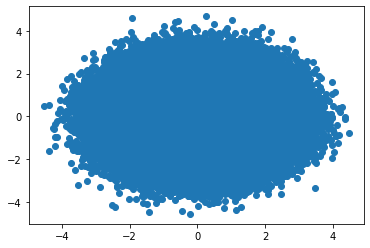

In [6]:
import numpy as np
import matplotlib.pyplot as plt

N = 1_000_000
# "стандартные случайные величины"
gamma1 = np.random.random(N // 2)
gamma2 = np.random.random(N // 2)
# розыгрыш сл. величины
r = (-2 * np.log(gamma1)) ** 0.5
x = r * np.cos(2 * np.pi * gamma2)
y = r * np.sin(2 * np.pi * gamma2)

plt.scatter(x,y)


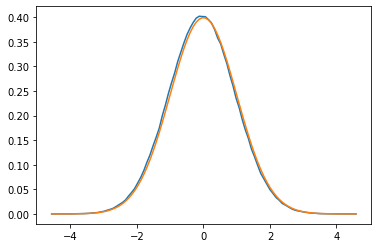

In [7]:
x_norm = np.vstack((x, y)).ravel('F')
# гистограмма
fr, X = np.histogram(x_norm, bins=100)
# нормирование для сопоставления с плотностью
X = X[:-1]
fr = fr / N * 100 / (max(X) - min(X))
# плотность
Y = 1/(2 * np.pi)**0.5 * np.exp(-X ** 2 / 2) 
# вывод графиков
plt.plot(X, fr)
plt.plot(X, Y)
plt.show()

In [8]:
import pandas as pd
df = pd.DataFrame(x_norm)
df.describe()

,0
count,1000000.000000
mean,0.000742
std,1.000374
min,-4.559269
25%,-0.674023
50%,0.000883
75%,0.675283
max,4.679595



Способ 2: ЦПТ

$$\xi \approx \xi^{(n)} = \sqrt{\frac{12}{n}}\sum_{i=1}^{n}{(\gamma_{i}-0.5)}$$
$$\xi^{(12)} = \sum_{i=1}^{12}{\gamma_{i}} - 6$$


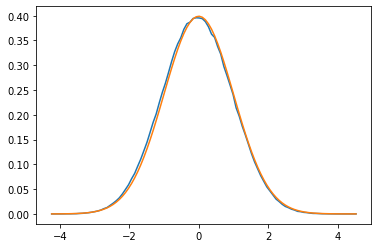

In [9]:
import numpy as np
import matplotlib.pyplot as plt

N = 1_000_000
# "стандартные случайные величины"
gamma = np.random.random(size=(N, 12))

# розыгрыш сл. величины
x = gamma.sum(axis=1) - 6

fr, X = np.histogram(x, bins=100)
# нормирование для сопоставления с плотностью
X = X[:-1]
fr = fr / N * 100 / (max(X) - min(X))
# плотность
Y = 1/(2 * np.pi)**0.5 * np.exp(-X ** 2 / 2) 
# вывод графиков
plt.plot(X, fr)
plt.plot(X, Y)
plt.show()

In [10]:
import pandas as pd
df = pd.DataFrame(x)
df.describe()

,0
count,1000000.000000
mean,0.000020
std,1.000659
min,-4.235660
25%,-0.681782
50%,0.000057
75%,0.682009
max,4.618790


**Пример 5 Метод мажорант**

Рассмотрим случайную величину $\xi$, имеющую плотность распределения $f_{\xi}(x)$, где

$$f_{\xi}(x) = \frac{4}{4-\pi} tg^{2}(x), 0<x<\frac{\pi}{4}$$ 
$$f_{\xi}(x) = \frac{g(x)}{G}, g(x)= tg^{2}(x), G = \frac{4-\pi}{4}, 0<x<\frac{\pi}{4}$$

Требуется определить мажоранту $g_{1}(x)$ (константу или функцию), такую что $g(x)\leq g_1(x)$.

Например:
$$g_{1}(x) = 2x^{2}, 0<x<\frac{\pi}{4}$$

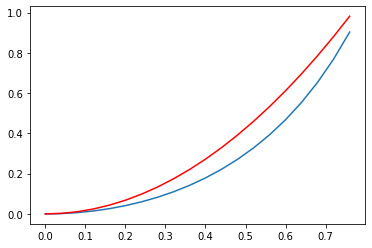

In [20]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0, np.pi/4, 0.04)
g1 = np.tan(x) ** 2
g2 = 2 * x**2
plt.plot(x,g1)
plt.plot(x,g2, 'r-')

Определяем плотность $f_1(x)$

$$f_1(x)=\frac{1}{G_1}g_1(x), G_1 = \int_{0}^{\frac{\pi}{4}}{g_1(x)}$$

При $g_{1}(x) = 2x^{2}, 0<x<\frac{\pi}{4}$ получаем $G_1=\frac{3\cdot 64}{\pi^3}$

Моделируем случайные величины $\xi_1$ распределенные по плотности $f_1(x)$ методом обратных функций.

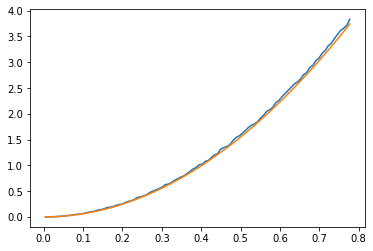

In [12]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000000
# "стандартные случайные величины"
gamma = np.random.random(N)

# розыгрыш сл. величины c плотностью f1 = g1/G1
G1 = 2 * np.pi ** 3 / (3 * 64) 
ksi1 = np.power(3 * gamma * G1 / 2, 1/3)

# гистограмма
fr, X = np.histogram(ksi1, bins=100)

# нормирование для сопоставления с плотностью
X = X[:-1]
fr = fr / N * 100 / (max(X) - min(X))
# плотность
Y = 2 * X ** 2 / G1
# вывод графиков
plt.plot(X, fr)
plt.plot(X, Y)
plt.show()


Реализуем случайную величину $\eta=\gamma_2 \cdot g_1(\xi_1)$.

Пара $(\xi_1, \eta)$ равномерна распределена "под графиком" $g_1$

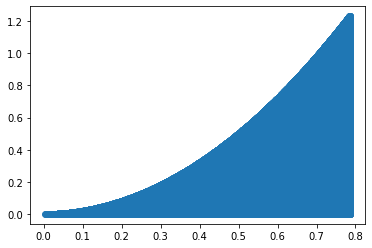

In [13]:
# продолжение
alpha = np.random.random(N)
eta = alpha * 2 * ksi1 ** 2
plt.scatter(ksi1, eta)

4.516462559579608


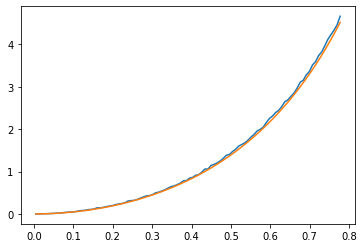

In [18]:
# отбор по заданной функции g

ksi = ksi1[eta < np.tan(ksi1) ** 2]  # ksi ~ f(x)

# гистограмма
fr, X = np.histogram(ksi, bins=100)

# нормирование для сопоставления с плотностью
X = X[:-1]
fr = fr / len(ksi) * 100 / (max(X) - min(X))
# плотность
Y = 4/(4-np.pi) * np.tan(X) ** 2
# вывод графиков
plt.plot(X, fr)
plt.plot(X, Y)
print(Y.max())
plt.show()
